# Assignment 2:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

my usual imports and setups

In [3]:
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [5]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [7]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1


In [109]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,gender,date,ageM,ageF,hour
0,1346,1/1/2015 0:01,1/1/2015 0:24,2,2015-01-01 00:01:00,NaN,55,0
1,363,1/1/2015 0:02,1/1/2015 0:08,1,2015-01-01 00:02:00,52,NaN,0
2,346,1/1/2015 0:04,1/1/2015 0:10,1,2015-01-01 00:04:00,41,NaN,0
3,182,1/1/2015 0:04,1/1/2015 0:07,1,2015-01-01 00:04:00,46,NaN,0
4,969,1/1/2015 0:05,1/1/2015 0:21,1,2015-01-01 00:05:00,38,NaN,0


In [11]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [12]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [81]:
#dropping some data I no longer need
df.drop(['start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype'], 
        axis=1, inplace=True)
df.head()

,tripduration,starttime,stoptime,gender,date,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,2,2015-01-01 00:01:00,NaN,55
1,363,1/1/2015 0:02,1/1/2015 0:08,1,2015-01-01 00:02:00,52,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,1,2015-01-01 00:04:00,41,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,1,2015-01-01 00:04:00,46,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,1,2015-01-01 00:05:00,38,NaN
5,496,1/1/2015 0:07,1/1/2015 0:15,2,2015-01-01 00:07:00,NaN,46
6,152,1/1/2015 0:07,1/1/2015 0:09,1,2015-01-01 00:07:00,43,NaN
7,1183,1/1/2015 0:08,1/1/2015 0:28,2,2015-01-01 00:08:00,NaN,30
8,846,1/1/2015 0:09,1/1/2015 0:23,1,2015-01-01 00:09:00,24,NaN
9,576,1/1/2015 0:10,1/1/2015 0:20,1,2015-01-01 00:10:00,24,NaN


In [59]:
df.describe()

,tripduration,gender,ageM,ageF
count,285552.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,1.162485,40.305272,38.951145
std,900.775928,0.419490,11.595240,11.405112
min,60.000000,0.000000,16.000000,17.000000
25%,334.000000,1.000000,31.000000,30.000000
50%,504.000000,1.000000,39.000000,37.000000
75%,772.000000,1.000000,48.000000,48.000000
max,43023.000000,2.000000,116.000000,89.000000


In [38]:
# dropping nan values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

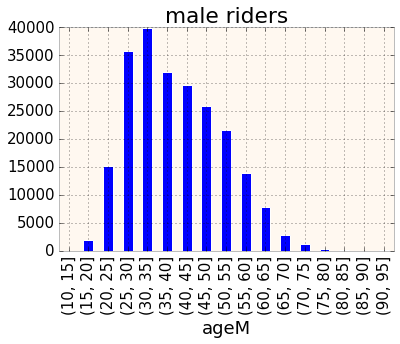

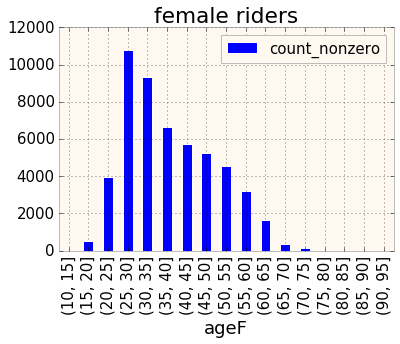

In [39]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")
pl.legend()

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]            NaN
(90, 95]            NaN


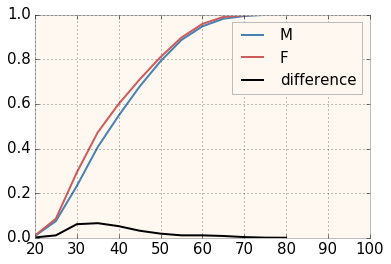

In [40]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")

pl.legend()

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there amay be Nan values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [41]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [42]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.067442557802207204, pvalue=4.0408611999082294e-168)


The scipy.stats KS test already tells me the significance and the p-value. I recalculate it for a reality check.

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/



In [45]:
# notice that the factor is very large!! its gonna be hard to get a stat larger than that!
np.sqrt((len(df['ageF']) + len(df['ageM']))/len(df['ageF']) * len(df['ageM']))

1106.1676246107415

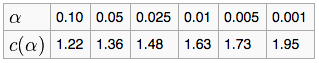

In [53]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="ks2sample_table.png")

# FILL IN THE CELLS BELOW!

In [1]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in termsof NULL HYPOTHESIS


#REMOVE
REJECTED at p<<0.05

# Now redo the test with a subsample of the data: take only 1 ride every of 200 

In [49]:
#REMOVE
ks = scipy.stats.ks_2samp(df.ageM[::200], df.ageF[::200])
print (ks)
# cannot reject

Ks_2sampResult(statistic=0.084866404959650726, pvalue=0.088972534286789196)


# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
## a. sorted and 
## b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [3]:
# your code here!
# please perform the Pearson's test and tell me what you find in terms of NULL hypothesis

Pearson's r (0.99757519548836426, 0.0)
51875 51875
Pearson's r (0.99757519548836426, 0.0)


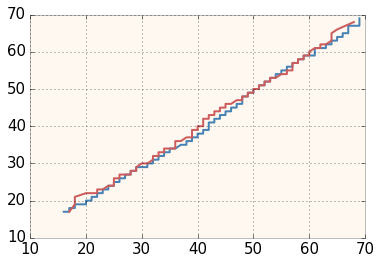

In [78]:
#REMOVE
##NOTE: the test is pairwise, so i have to sorte the ages! 
## we are trying to see if 2 vasiables change in a similar way, so it is intuitive 
## that they should be sorted by the natural scale, in this case age



#r_P = scipy.stats.pearsonr(df.ageM, df.ageF)
# the samples need to be cleaned off nan values and the male sample has unlikely values >90 years which i am remoging
ageFsorted = df.ageF.sort_values()[df.ageF<70]
ageMsorted = np.sort(np.random.choice(df.ageM[df.ageM<70], len(ageFsorted), replace=False))

r_P = scipy.stats.pearsonr(ageMsorted, ageFsorted)
print  ("Pearson's r" , r_P)

pl.plot(ageMsorted, ageFsorted)

ageFsorted_short = df.ageF.sort_values()[df.ageF<70][::200]
ageMsorted_short = np.sort(np.random.choice(df.ageM[df.ageM<70][::200], len(ageFsorted_short), replace=False))
print (len(ageFsorted), len(ageMsorted))
r_P = scipy.stats.pearsonr(ageMsorted, ageFsorted)
print  ("Pearson's r" , r_P)

pl.plot(ageMsorted_short, ageFsorted_short)


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [79]:
# your code here!
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

In [80]:
#remove
r_S = scipy.stats.spearmanr(ageMsorted, ageFsorted)
print  (r_S)


SpearmanrResult(correlation=0.99916344221143605, pvalue=0.0)


## please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

## CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!

hint: remember how I converted the starttime last time in my own citibikes notebook into units that are easy to read. 
df['mystarttime'] = ...
then you can use something like
df['mystarttime'].dt.hour

In [108]:
df['hour'] = df['date'].map(lambda ts: ts.hour)
dayrider 

,tripduration,starttime,stoptime,gender,date,ageM,ageF,hour
563,1542,1/1/2015 6:00,1/1/2015 6:26,0,2015-01-01 06:00:00,NaN,NaN,6
564,166,1/1/2015 6:05,1/1/2015 6:07,1,2015-01-01 06:05:00,32,NaN,6
565,972,1/1/2015 6:10,1/1/2015 6:26,1,2015-01-01 06:10:00,46,NaN,6
566,238,1/1/2015 6:10,1/1/2015 6:14,1,2015-01-01 06:10:00,44,NaN,6
567,1214,1/1/2015 6:13,1/1/2015 6:33,2,2015-01-01 06:13:00,NaN,28,6
568,442,1/1/2015 6:15,1/1/2015 6:23,1,2015-01-01 06:15:00,30,NaN,6
569,220,1/1/2015 6:15,1/1/2015 6:19,1,2015-01-01 06:15:00,27,NaN,6
570,201,1/1/2015 6:19,1/1/2015 6:23,1,2015-01-01 06:19:00,57,NaN,6
571,422,1/1/2015 6:24,1/1/2015 6:31,1,2015-01-01 06:24:00,65,NaN,6
572,370,1/1/2015 6:24,1/1/2015 6:31,1,2015-01-01 06:24:00,20,NaN,6


In [112]:
dayrider = df[(df['hour'].values>5) * (df['hour'].values<18)]
nightrider = df[(df['hour'].values<5) + (df['hour'].values>18)]
ageD = 2015 - dayrider['birth year']
ageN = 2015 - nightrider['birth year']

KeyError: 'birth year'

In [105]:
ks = scipy.stats.ks_2samp(dayrider, nightrider)
print (ks)

TypeError: Cannot compare type 'Timestamp' with type 'float'